## 코호트 분석

- 특정 기간 동안 일정 기준으로 동일하게 묶을 수 있는 사용자들의 집단 => 소비자들을 동일한 집단으로 묶고 이들의 패턴을 살펴봄
- 고객들의 재방문율을 높이고 이를 유지하는 것이 중요

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('./data/e-commerce.csv')

In [67]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [68]:
# 월별 계산을 위해 구매주기 변수 생성
df['구매주기'] = df['날짜'].dt.strftime('%Y-%m')
df['구매금액'] = (df['평균금액'] * (1-df['할인율']) * (1+df['GST']) * df['수량']) + df['배송료']
df

,날짜,오프라인비용,온라인비용,고객ID,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,할인율,구매주기,구매금액
0,2019-01-01,4500,2424.50,USER_1358,Transaction_0000,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,0.1,2019-01,158.6729
1,2019-01-01,4500,2424.50,USER_1358,Transaction_0001,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,0.1,2019-01,158.6729
2,2019-01-01,4500,2424.50,USER_1358,Transaction_0013,Product_0983,Nest-USA,2,122.77,6.5,Not Used,남,Chicago,12,0.10,0.0,2019-01,276.5940
3,2019-01-01,4500,2424.50,USER_1358,Transaction_0015,Product_0984,Nest-USA,1,81.50,6.5,Clicked,남,Chicago,12,0.10,0.0,2019-01,96.1500
4,2019-01-01,4500,2424.50,USER_1358,Transaction_0016,Product_0981,Nest-USA,1,153.71,6.5,Clicked,남,Chicago,12,0.10,0.0,2019-01,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,2019-12-31,4000,2058.75,USER_0167,Transaction_25041,Product_0994,Nest,1,355.74,6.5,Clicked,여,Chicago,48,0.05,0.0,2019-12,380.0270
52920,2019-12-31,4000,2058.75,USER_0167,Transaction_25043,Product_0992,Nest,1,100.91,6.5,Not Used,여,Chicago,48,0.05,0.0,2019-12,112.4555
52921,2019-12-31,4000,2058.75,USER_0504,Transaction_25053,Product_0992,Nest,1,100.91,6.5,Clicked,여,New York,45,0.05,0.0,2019-12,112.4555
52922,2019-12-31,4000,2058.75,USER_0504,Transaction_25054,Product_0992,Nest,1,100.91,6.5,Clicked,여,New York,45,0.05,0.0,2019-12,112.4555


### 첫 구매가 이루어진 월 파악하기

In [69]:
first_order = df.groupby('고객ID').날짜.min()
first_order = first_order.dt.strftime('%Y-%m')
first_order

고객ID
USER_0000    2019-09
USER_0001    2019-03
USER_0002    2019-06
USER_0003    2019-12
USER_0004    2019-09
              ...   
USER_1463    2019-04
USER_1464    2019-06
USER_1465    2019-04
USER_1466    2019-10
USER_1467    2019-07
Name: 날짜, Length: 1468, dtype: object

In [70]:
df = df.set_index('고객ID')
df = df.sort_index()
df['첫구매월'] = first_order

In [71]:
df = df.sort_index()
df.reset_index(inplace=True)
df

,고객ID,날짜,오프라인비용,온라인비용,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,할인율,구매주기,구매금액,첫구매월
0,USER_0000,2019-09-15,3000,2546.67,Transaction_16900,Product_0048,Apparel,1,19.99,75.00,Used,여,New York,31,0.18,0.3,2019-09,91.51174,2019-09
1,USER_0000,2019-09-15,3000,2546.67,Transaction_16900,Product_0946,Office,2,5.50,75.00,Used,여,New York,31,0.10,0.3,2019-09,83.47000,2019-09
2,USER_0001,2019-03-24,2000,1984.00,Transaction_5262,Product_0945,Office,1,2.99,14.41,Clicked,남,New York,20,0.10,0.0,2019-03,17.69900,2019-03
3,USER_0001,2019-11-02,2000,2437.58,Transaction_20187,Product_0104,Apparel,1,5.25,6.00,Not Used,남,New York,20,0.18,0.0,2019-11,12.19500,2019-03
4,USER_0001,2019-03-24,2000,1984.00,Transaction_5274,Product_0844,Bags,2,3.99,6.50,Not Used,남,New York,20,0.18,0.0,2019-03,15.91640,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1467,2019-10-10,3500,3705.50,Transaction_18610,Product_0004,Apparel,1,15.99,6.50,Clicked,여,New Jersey,36,0.18,0.0,2019-10,25.36820,2019-07
52920,USER_1467,2019-07-29,2500,1353.73,Transaction_13450,Product_0189,Apparel,1,12.31,6.00,Used,여,New Jersey,36,0.18,0.1,2019-07,19.07322,2019-07
52921,USER_1467,2019-07-29,2500,1353.73,Transaction_13450,Product_1024,Apparel,1,13.59,6.00,Used,여,New Jersey,36,0.18,0.1,2019-07,20.43258,2019-07
52922,USER_1467,2019-07-29,2500,1353.73,Transaction_13447,Product_0205,Apparel,1,7.60,6.00,Used,여,New Jersey,36,0.18,0.1,2019-07,14.07120,2019-07


### 월별 구매 고객 데이터 살펴보기

In [72]:
# 구매주기별 고객수 계산
user = df.groupby(['첫구매월','구매주기']).고객ID.nunique()
user = user.reset_index()
user.rename({'고객ID':'총고객수'}, axis=1, inplace=True)
user

,첫구매월,구매주기,총고객수
0,2019-01,2019-01,215
1,2019-01,2019-02,13
2,2019-01,2019-03,24
3,2019-01,2019-04,34
4,2019-01,2019-05,23
...,...,...,...
73,2019-10,2019-11,6
74,2019-10,2019-12,4
75,2019-11,2019-11,68
76,2019-11,2019-12,7


In [73]:
# 구매주기별 구매금액 계산
purchase = df.groupby(['첫구매월','구매주기']).구매금액.sum()
purchase = purchase.reset_index()
purchase.rename({'구매금액':'총구매금액'}, axis=1, inplace=True)
purchase

,첫구매월,구매주기,총구매금액
0,2019-01,2019-01,494033.93965
1,2019-01,2019-02,46524.59322
2,2019-01,2019-03,58766.61620
3,2019-01,2019-04,132371.20117
4,2019-01,2019-05,35904.77432
...,...,...,...
73,2019-10,2019-11,10573.87820
74,2019-10,2019-12,2902.18245
75,2019-11,2019-11,234613.92416
76,2019-11,2019-12,4919.36123


In [74]:
# user, purchase 데이터 병합
user_purchase = user.merge(purchase, on=['첫구매월','구매주기'])
user_purchase

,첫구매월,구매주기,총고객수,총구매금액
0,2019-01,2019-01,215,494033.93965
1,2019-01,2019-02,13,46524.59322
2,2019-01,2019-03,24,58766.61620
3,2019-01,2019-04,34,132371.20117
4,2019-01,2019-05,23,35904.77432
...,...,...,...,...
73,2019-10,2019-11,6,10573.87820
74,2019-10,2019-12,4,2902.18245
75,2019-11,2019-11,68,234613.92416
76,2019-11,2019-12,7,4919.36123


### 코호트 분석 데이터 완성하기

#### 1. 코호트 기간 계산하기

In [75]:
from ipypb import ipb

# 코호트 기간을 담을 빈 리스트 생성
lst = []

# 코호트 기간을 계산하기 위한 반복문 실시
for i in ipb(range(user_purchase.shape[0])):
    
    # 첫 구매월 변수를 월 단위로 변환
    first_order = pd.to_datetime(user_purchase.첫구매월[i]).to_period('M')
    
    # 구매주기 변수를 월 단위로 변환
    order_cycle = pd.to_datetime(user_purchase.구매주기[i]).to_period('M')
    
    # 월 단위로 변환한 변수들을 연산(차이 계산)
    month_diff = (order_cycle - first_order).n
    
    # 빈 리스트에 저장
    lst.append(month_diff)

# 반복문을 통해 생성된 리스트를 '코호트 기간'이라는 이름으로 위 데이터에 추가
user_purchase['코호트기간'] = lst

user_purchase

 [████████████████████████████████████████████████████████████] 78/78 [00:00<00:00, 0.00s/it]

,첫구매월,구매주기,총고객수,총구매금액,코호트기간
0,2019-01,2019-01,215,494033.93965,0
1,2019-01,2019-02,13,46524.59322,1
2,2019-01,2019-03,24,58766.61620,2
3,2019-01,2019-04,34,132371.20117,3
4,2019-01,2019-05,23,35904.77432,4
...,...,...,...,...,...
73,2019-10,2019-11,6,10573.87820,1
74,2019-10,2019-12,4,2902.18245,2
75,2019-11,2019-11,68,234613.92416,0
76,2019-11,2019-12,7,4919.36123,1


#### 2. 재구매율 계산하기
user_purchase 데이터에서 총 고객수를 기준으로 계산하고 2번째 인덱스인 코호트 기간을 열로 설정함

In [77]:
retention = user_purchase.set_index(['첫구매월','코호트기간'])
retention = retention.총고객수.unstack(1)
retention = retention.div(retention[0], axis=0)
retention

코호트기간,0,1,2,3,4,5,6,7,8,9,10,11
첫구매월,,,,,,,,,,,,
2019-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. 구매 규모 형태 계산하기
user_purchase 데이터에서 총 구매금액을 기준으로 계산하고 코호트 기간을 열로 설정함

In [78]:
purchase_scale = user_purchase.set_index(['첫구매월','코호트기간'])
purchase_scale = purchase_scale.총구매금액.unstack(1)
purchase_scale

코호트기간,0,1,2,3,4,5,6,7,8,9,10,11
첫구매월,,,,,,,,,,,,
2019-01,494033.93965,46524.59322,58766.61620,132371.20117,35904.77432,58138.76886,100013.31846,60817.48788,45279.91794,53424.65220,43409.50500,98246.97951
2019-02,328527.72640,9713.34096,15245.20459,26493.43090,26419.86122,51023.82017,28265.56008,48843.84933,19684.36813,30858.13588,50814.22495,NaN
2019-03,345915.45684,48324.29652,42296.16734,33152.95882,56467.28110,78954.12196,52348.77393,45813.63846,26848.50490,38784.11711,NaN,NaN
2019-04,281349.89188,27535.49820,18427.50077,35842.73400,28650.18202,32861.09604,18335.97736,60704.78558,19593.61586,NaN,NaN,NaN
2019-05,233156.31664,7486.17954,14888.79538,17758.43786,17872.70154,42396.68994,40648.50728,11998.29626,NaN,NaN,NaN,NaN
2019-06,217239.04396,13263.41489,15406.28552,17593.95762,12035.33070,40455.37496,16592.70259,NaN,NaN,NaN,NaN,NaN
2019-07,180262.55822,17013.35650,7874.34157,16592.38388,25877.72096,30062.89314,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,228805.36720,11352.22906,12863.37996,31034.42718,18046.28500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,162440.44777,2146.78236,2745.76436,736.70605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 코호트 분석 시각화하기

#### 1. 재구매율 시각화

In [81]:
# 설치된 폰트 출력
from matplotlib import font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

plt.rcParams['font.family'] = 'NanumGothic'

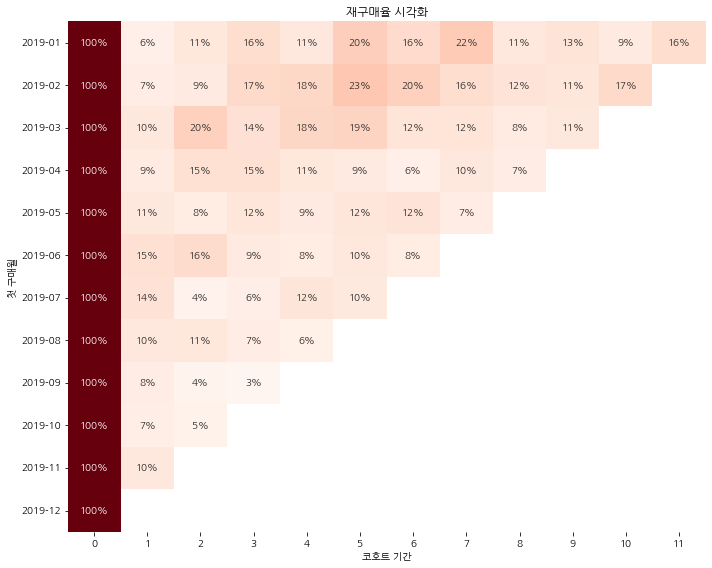

In [110]:
plt.figure(figsize = (10, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Reds', cbar=False)
plt.xlabel('코호트 기간')
plt.ylabel('첫 구매월')
plt.title('재구매율 시각화')
plt.tight_layout()
plt.show()

#### 2. 구매 규모 시각화

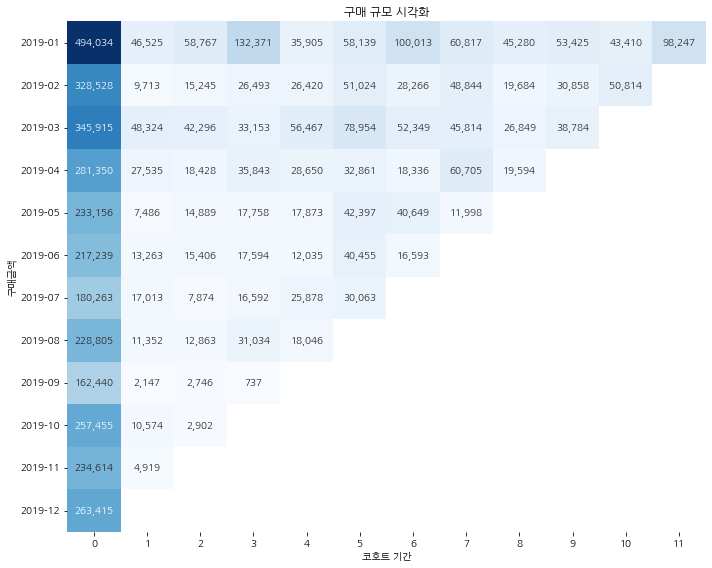

In [109]:
plt.figure(figsize = (10, 8))
sns.heatmap(purchase_scale, annot=True, fmt=',.0f', cmap='Blues', cbar=False)
plt.xlabel('코호트 기간')
plt.ylabel('구매금액')
plt.title('구매 규모 시각화')
plt.tight_layout()
plt.show()